In [1]:
!pip install diffusers transformers accelerate safetensors torch matplotlib pillow --quiet

In [2]:
import os
import torch
import zipfile
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline
from PIL import Image
from google.colab import files


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


In [3]:
if torch.cuda.is_available():
    device = "cuda"
    print("GPU detected and will be used.")
else:
    device = "cpu"
    print("GPU not detected. Running on CPU (slower).")


GPU detected and will be used.


In [4]:
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)

pipe = pipe.to(device)
print("Stable Diffusion model loaded successfully.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Stable Diffusion model loaded successfully.


In [5]:
prompts = [
    "A peaceful Himalayan village at sunrise with snow-covered mountains",
    "A futuristic underwater research laboratory with glowing marine life",
    "An AI-powered classroom with holographic teaching screens",
    "A space station orbiting Mars with astronauts working outside",
    "A smart eco-friendly city powered entirely by solar energy"
]

In [6]:
output_dir = "synthetic_image_dataset"
os.makedirs(output_dir, exist_ok=True)
print(f"Dataset folder '{output_dir}' created successfully.")

Dataset folder 'synthetic_image_dataset' created successfully.


In [7]:
generated_images = []

for i, prompt in enumerate(prompts):
    print(f"Generating image {i+1}/{len(prompts)}...")

    image = pipe(prompt).images[0]

    file_path = os.path.join(output_dir, f"image_{i+1}.png")
    image.save(file_path)

    generated_images.append(image)

print("All images generated and saved successfully.")

Generating image 1/5...


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image 2/5...


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image 3/5...


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image 4/5...


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image 5/5...


  0%|          | 0/50 [00:00<?, ?it/s]

All images generated and saved successfully.


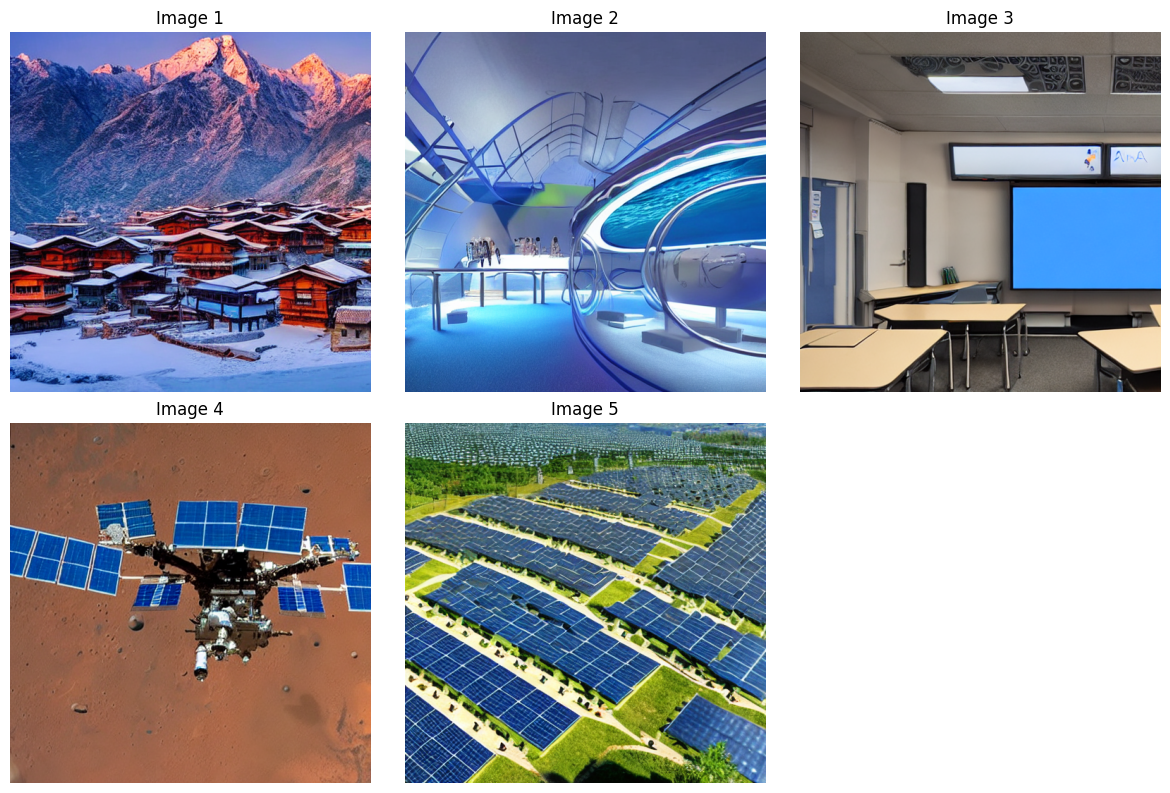

In [8]:
plt.figure(figsize=(12, 8))

for i, img in enumerate(generated_images):
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image {i+1}")

plt.tight_layout()
plt.show()


In [9]:
print("Dataset contents:")
print(os.listdir(output_dir))

Dataset contents:
['image_4.png', 'image_1.png', 'image_5.png', 'image_2.png', 'image_3.png']


In [10]:
zip_name = "synthetic_image_dataset.zip"

with zipfile.ZipFile(zip_name, 'w') as zipf:
    for file in os.listdir(output_dir):
        zipf.write(os.path.join(output_dir, file))

print("Dataset zipped successfully.")

Dataset zipped successfully.


In [11]:
files.download(zip_name)

print("Experiment completed successfully!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Experiment completed successfully!
